# <center> Digital Marketing Group Assignment 3 <center>

<center> Dimitri Benchev (CID 01789442) <br>
    Yekaterina Brovar (CID 01739213) <br>
    Bart Hutten (CID 01806794) <center> 

In [784]:
import pandas as pd
import datetime as dt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Q1

## 1)
#### What goals should Chan and her team accomplish?

Chan needs to advise Sales and Marketing team of the new opening hotel on launching a digital marketing campaign that would maximise occupancy rates from the first month. To do this Chan has to raise awareness (while keeping to and maintaining the brand perception of the W brand) about the new hotel opening in six months, what the W is and the experience associated with it. All this with the objective to engage consumers to book rooms during that first months.
More concretely, with a limited budget of \$44,000 Chan should:
* develop a plan that would establish an online presence through digital advertising platforms
* appropriately allocate the marketing budget across different advertising platforms
* synchronise these platforms with global Starwood website and booking system or create a hotel’s independent website (at the cost of \$3,000)

## 2)  
#### What feeder markets should Chan choose for the digital campaign and why?

At the time of the hotel opening Asia Pacific economies were growing. Especially China's economy was growing at 9.2% and the rest of Asia at 4.8%. This led to increasing affluence and strong tourism growth in APAC. Exhibit 2 is useful to identify the main feeder markets. The fastest growing markets (China, India, Japan, Philippines, Malaysia) already make a significant contribution to Singapore's tourism sector, so it makes sense to target them. These markets spend up to 40% on "Other Activities" which could be beneficial for the hotel, given the "destination within a destination" branding of The W and its emphasis on events. 

*Furthermore,  Only Accommodation and Food and Beverages components of the total spending were taken into account and top 5 countries (feeder markets) as of 2011 were Indonesia, China, India, Australia and Philippines.*
 
Furthermore, targeting Indonesian and Chinese travellers (the 2 biggest markets for Singapore) who are interested in doing shoppingin the nearby high-end Orchard Road could be another opportunity, given the high percentage of shopping spend for these 2 countries.

Singapore's tourism also relies on domestic tourism that grew 32% and have large number of high income earners. Therefore Singapore is also one of the feeder markets. Given that domestic tourism is seen as a novelty, that suggests a new market may be opening up.

## 3) 
#### If the CTR is 0.05 and the expected yield is 0.002 to 0.006 reservations, how many impressions will Chan need so as to achieve her booking goal? What will be her cost per click?

Campaign is expected to account for 15-20% of the 240 rooms booked within the 1st month. We assume that 50% of the bookings come from **ad views** and other 50% from **email and other** channels. Also it is stated that customers usually stay 2-3 nights. Furthermore, the occupancy rate for chain hotels at Sentosa was 84%.

$ \frac{1}{2} \times \frac{240~rooms~ \times~ 30~days}{2.5 ~ days ~per~stay} \times 0.84 \times 0.175 \approx 212$  bookings need to be made from the **ad campaign**.

To achieve 212 bookings there has to be $\frac{212}{0.004} = 53,000$ clicks on the ad, if the average yield is 0.4%. If CTR is 5% then there should be $\frac{53,000}{0.05} = 1,060,000$ impressions.

The implied CPC would be $\frac{44,000} {53,000} = \$0.83$. This is very close to the \\$1 CPM with the 0.09% CTR, that are mentioned as average rates in the case, which gives a CPC of \$0.9.

The range of these values would be $$ \frac{1}{2} \times \frac{240~rooms~ \times~ 30~days}{2.5 ~ days ~per~stay} \times 0.84 \times 0.175 \times \frac{1}{0.002} \approx 105,840 ~clicks $$

$$\frac{105,840}{0.05} = 2,116,800 ~ impressions $$

$$CPC = \frac{44,000} {105,840} = \$0.42$$

At the other extreme, with yield of 0.6%

$$ \frac{1}{2} \times \frac{240~rooms~ \times~ 30~days}{2.5 ~ days ~per~stay} \times 0.84 \times 0.175 \times \frac{1}{0.006} \approx 35,280 ~clicks $$

$$\frac{35,280}{0.05} = 705,600 ~ impressions $$

$$CPC = \frac{44,000} {35,280} = \$1.25$$

# Q2

## a)  Celebrity reviews vs. customer reviews vs. video reviews

We decided to do several analysis to identify which review type is more influential and effective:
1. Per user review the whole path of clickstreams that led to a purchase and out of all the purchases identify if the purchase was made after reading celebrity reviews, customer or video reviews. This will help us to identify a channel that led to the highest percentage of purchases. 
2. Length of the customer journey per review type: As part of the same analysis compare the length of the clickstream path that ended with a purchase after customer read a review, celebrity recommendation or video review. The shorter the path, the more effective is the review source
3. Compare conversion rates for customer, celebrity and video reviews: Out of all customers who read only customer or only celebrity reviews or only watched the video reviews, what percentage bought the product at the end.

REMOVE??????:
1. We only analyse product 1 and 2 as for these products we have all three types of reviews. Comparing effectiveness of celebrity reviews of product 1 and customer reviews of product 3 doesnt make sense as there could be other reasons for different rates of purchase frequency other than review type (e.g. different product type).
2. There are some cases where a customer was exposed to several types of reviews (e.g. read both type of reviews or also watched video review). In this case it is not clear which channel was the most influential. Therefore in this analysis we only focus on the cases where customer was exposed only to one out of three review types to make a more accurate causal decision.

Looking at **gender** and **birthdate**, we see that not all user sessions are populated. For example, only 13,380 of the 16,929 total purchases made contain information on gender. We will make use of gender if there are any useful patterns. However, we can see that most purchasers were born in the 1980s-90s, so we have an imbalance there. Furthermore, given that we don't have any other context about product, it is difficult to  identify meaningful age groups. If we had the information about the product the next step would be to also analyse the behavior among reasonably defined age groups. Therefore, we don't analyse date of birth further.

In [1352]:
clickstream_data = pd.read_csv('HW3_data/clickstream-feed-generated.tsv', sep='|', 
                               names = ['clickstream_id','timestamp','IP_address','url','is_purchased','is_page_errored','user_session_id','city','state','country'])

sex_birth_data = pd.read_csv('HW3_data/regusers.tsv', sep='\t', header = 0)
# Merge
clickstream_data = pd.merge(clickstream_data, sex_birth_data, how= 'left', left_on='user_session_id', right_on='SWID')

In [1353]:
# Sort data by IP and timestamp
clickstream_data.sort_values(['IP_address', 'timestamp'], inplace=True)
clickstream_data.reset_index(inplace=True)

In [1354]:
# Add Product Reference Column
clickstream_data['product'] = clickstream_data['url'].apply(lambda x: x[-1] if x[-1] in ('1','2','3','4','5') else "home")

# Convert timestamp to datetime
clickstream_data['timestamp'] = pd.to_datetime(clickstream_data['timestamp'])
clickstream_data['BIRTH_DT'] = pd.to_datetime(clickstream_data['BIRTH_DT'], format = '%d-%b-%y')

# Add column with only the date
clickstream_data["date"] = [d.date() for d in clickstream_data["timestamp"]]

# Add this cumulative count as some IP-time pairs appear multiple times, which messes up the lagged URL function underneath
clickstream_data['IP_click_count'] = clickstream_data.groupby(['IP_address'])['url'].cumcount() # used to be groupby(['IP_address', 'date'])

In [1355]:
# Extract year of birth
clickstream_data['year'] = clickstream_data['BIRTH_DT'].apply(lambda x: x.date().year if ~ pd.isnull(x) else "")

We can see that there are an equal number of purchases made by Males, Females, and about 50% less by Unidentified.

In [1356]:
# Breakdown of purchases by Gender
clickstream_data[(clickstream_data['is_purchased'] == 1) 
                 & ( ~ clickstream_data['GENDER_CD'].isna()) ].groupby('GENDER_CD')[['index']].count()

,index
GENDER_CD,
F,5572
M,5330
U,2478


In [1357]:
# Purchases made by people born in different years
clickstream_data[clickstream_data['is_purchased']==1].groupby('year')[['index']].count().sort_values('index', ascending= False).head(10)

,index
year,
1989.0,728
1990.0,712
1988.0,711
1986.0,657
1987.0,630
1985.0,607
1991.0,593
1992.0,546
1983.0,542


In [1358]:
# Remove unneeded columns
clickstream_data.drop(columns = ['SWID', 'BIRTH_DT','year'], inplace = True)

In [1331]:
clickstream_data.head()

,index,clickstream_id,timestamp,IP_address,url,is_purchased,is_page_errored,user_session_id,city,state,country,GENDER_CD,product,date,IP_click_count
0,415401,1331866529,2012-03-15 19:55:29,100.1.113.13,http://www.RL.com/product/4002,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,NaN,2,2012-03-15,0
1,415405,1331866538,2012-03-15 19:55:38,100.1.113.13,http://www.RL.com/,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,NaN,home,2012-03-15,1
2,415407,1331866539,2012-03-15 19:55:39,100.1.113.13,http://www.RL.com/product/4001,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,NaN,1,2012-03-15,2
3,415416,1331866554,2012-03-15 19:55:54,100.1.113.13,http://www.RL.com/product/4003,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,NaN,3,2012-03-15,3
4,415472,1331866610,2012-03-15 19:56:50,100.1.113.13,http://www.RL.com/product/4002,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,NaN,2,2012-03-15,4


In [1359]:
# Fixing Time - IP duplicates by adding a second

clickstream_data['ip_s'] = clickstream_data['IP_address'].shift(1)
clickstream_data['time_s'] = clickstream_data['timestamp'].shift(1)
# clickstream_data['url_s'] = clickstream_data['url'].shift(1)

clickstream_data.loc[(clickstream_data['ip_s'] == clickstream_data['IP_address']) & (clickstream_data['time_s'] == clickstream_data['timestamp']), 'new'] = 1

# add 1 second to 2nd instance when have the exact same time-IP pair a
clickstream_data.loc[clickstream_data['new']==1,'timestamp'] += dt.timedelta(seconds=1)

# delete intermediate columns
clickstream_data.drop(columns = ['ip_s', 'time_s', 'new'], inplace= True)

In [1360]:
# Add first session datetime for a given IP_Address 

first_sess = clickstream_data[['IP_address','date']].groupby('IP_address').first()
# first_sess = clickstream_data[['IP_address','timestamp']].sort_values(['IP_address','timestamp']).groupby('IP_address').first()
first_sess.rename(columns={'date':'first_session'}, inplace=True)

clickstream_data = clickstream_data.join(first_sess, on= 'IP_address', how = 'left')

In [1361]:
# Calculate difference in days only
clickstream_data['time_since_1st_sess'] = clickstream_data['date'] -clickstream_data['first_session']
# exclude counting as "0 days" the rows for when session starts.
clickstream_data['time_since_1st_sess'] = clickstream_data['time_since_1st_sess'].apply(lambda x: x.days if x != pd.Timedelta('0 days') else "")

We can see that the large majority of sessions per IP address (**13,012**) last less than a day, and similarly, most purchases (**13,098**) are made in the same day as user first went online.

In [1362]:
# Most sessions per IP address last less than a day 
clickstream_data[['IP_address', 'date', 'time_since_1st_sess']].groupby('IP_address').last().groupby('time_since_1st_sess').count()
# clickstream_data[['IP_address', 'timestamp', 'time_since_1st_sess']].sort_values(['IP_address','timestamp']).groupby('IP_address').last().groupby('time_since_1st_sess').count()

,date
time_since_1st_sess,
1,862
2,288
3,192
4,210
5,198
6,248
7,529
8,250
9,163


In [1363]:
# Most purchases are made in the same day as initiating the session per IP.
# Should attribution be for ALL clicks within the same day ???? 
clickstream_data[clickstream_data['is_purchased']==1]\
[['IP_address', 'date', 'time_since_1st_sess']].groupby('time_since_1st_sess', as_index=False)\
['IP_address'].count()

,time_since_1st_sess,IP_address
0,1,933
1,2,423
2,3,281
3,4,264
4,5,254
5,6,302
6,7,591
7,8,260
8,9,205
9,10,109


### 1. Analysis of purchased products and review types associated with the purchases.

We can see that all products were purchased roughly the same number of times (3300-3400) and the product page was clicked a similar number of times (23,000-24,000). We observed that a user often starts a new session **seconds** after ending the previous session. Given that and the fact that most sessions/purchases happen in the same day, we make a simplifying assumption that ,for example, watching a review day(s) before buying something affects your decision to buy. Therefore, we group clicks by **IP_Address** rather than **user_session_id**.

Furthermore, we can see that there is no significant difference in product choices between Males and Females, with both buying about 1000 product of each, and Unidentified about 500 of each.

In [1364]:
# Calculate # of clicks on each product page, by purchases or not.
# All products have the same number of times people have stayed on product page, so we have no imbalances. 
t1 = clickstream_data.groupby(['url','is_purchased'])['index'].agg([('click_count', 'count')]).reset_index()#[['index']].count().reset_index()
t1[t1['url'].str.contains('product')]

,url,is_purchased,click_count
1,http://www.RL.com/product/4001,0,23661
2,http://www.RL.com/product/4001,1,3424
3,http://www.RL.com/product/4002,0,23459
4,http://www.RL.com/product/4002,1,3439
5,http://www.RL.com/product/4003,0,23851
6,http://www.RL.com/product/4003,1,3376
7,http://www.RL.com/product/4004,0,23474
8,http://www.RL.com/product/4004,1,3380
9,http://www.RL.com/product/4005,0,23658
10,http://www.RL.com/product/4005,1,3310


In [1348]:
# Calculate # of clicks on each product page, by purchase and Gender.
# All products have the same number of times people have stayed on product page, so we have no imbalances. 
t1 = clickstream_data.groupby(['GENDER_CD','url','is_purchased'])['index'].agg([('click_count', 'count')]).reset_index()#[['index']].count().reset_index()
t1[t1['url'].str.contains('product')]

,GENDER_CD,url,is_purchased,click_count
1,F,http://www.RL.com/product/4001,0,7538
2,F,http://www.RL.com/product/4001,1,1194
3,F,http://www.RL.com/product/4002,0,7524
4,F,http://www.RL.com/product/4002,1,1130
5,F,http://www.RL.com/product/4003,0,7560
6,F,http://www.RL.com/product/4003,1,1097
7,F,http://www.RL.com/product/4004,0,7650
8,F,http://www.RL.com/product/4004,1,1069
9,F,http://www.RL.com/product/4005,0,7557
10,F,http://www.RL.com/product/4005,1,1082


In [1365]:
# clickstream_data_new_1=clickstream_data_new_1[clickstream_data_new_1['user_session_id'].isin(purchasers_1)]
clickstream_data['video']=clickstream_data['url'].apply(lambda x: 1 if 'video' in x else 0)
clickstream_data['review']=clickstream_data['url'].apply(lambda x: 1 if 'review' in x else 0)
clickstream_data['recommendation']=clickstream_data['url'].apply(lambda x: 1 if 'reco' in x else 0)
clickstream_data['video_cum'] = clickstream_data.groupby(['IP_address','product'])['video'].cumsum()
clickstream_data['review_cum'] = clickstream_data.groupby(['IP_address','product'])['review'].cumsum()
clickstream_data['recommendation_cum'] = clickstream_data.groupby(['IP_address','product'])['recommendation'].cumsum()

In [1370]:
# Count of total purchases by product & GENDER
attribution = clickstream_data[(clickstream_data['is_purchased']==1)].groupby(['GENDER_CD','product'])['index'].agg([('total_purchases', 'count')]).reset_index()

# Attribution by review type
# review only
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']>=1)&
                                                    (clickstream_data['video_cum']==0)&
                                                    (clickstream_data['recommendation_cum']==0)]\
                       .groupby(['GENDER_CD','product'])['index'].agg([('review', 'count')]).reset_index(), how = 'left', on = ['GENDER_CD','product']  )
# video only
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']==0)&
                                                    (clickstream_data['video_cum']>=1)&
                                                    (clickstream_data['recommendation_cum']==0)]\
                       .groupby(['GENDER_CD','product'])['index'].agg([('video', 'count')]).reset_index(), how = 'left', on = ['GENDER_CD','product']  )
# recommendation only
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']==0)&
                                                    (clickstream_data['video_cum']==0)&
                                                    (clickstream_data['recommendation_cum']>=1)]\
                       .groupby(['GENDER_CD','product'])['index'].agg([('recommend', 'count')]).reset_index(), how = 'left', on = ['GENDER_CD','product'] )
# review & video 
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']>=1)&
                                                    (clickstream_data['video_cum']>=1)&
                                                    (clickstream_data['recommendation_cum']==0)]\
                       .groupby(['GENDER_CD','product'])['index'].agg([('review_and_video', 'count')]).reset_index(), how = 'left', on = ['GENDER_CD','product'] )

# review & recommendation 
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']>=1)&
                                                    (clickstream_data['video_cum']==0)&
                                                    (clickstream_data['recommendation_cum']>=1)]\
                       .groupby(['GENDER_CD','product'])['index'].agg([('review_and_recommend', 'count')]).reset_index(), how = 'left', on = ['GENDER_CD','product'] )

# video & recommendation 
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']==0)&
                                                    (clickstream_data['video_cum']>=1)&
                                                    (clickstream_data['recommendation_cum']>=1)]\
                       .groupby(['GENDER_CD','product'])['index'].agg([('video_and_recommend', 'count')]).reset_index(), how = 'left', on = ['GENDER_CD','product'] )

# all
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']>=1)&
                                                    (clickstream_data['video_cum']>=1)&
                                                    (clickstream_data['recommendation_cum']>=1)]\
                       .groupby(['GENDER_CD','product'])['index'].agg([('all', 'count')]).reset_index(), how = 'left', on = ['GENDER_CD','product'] )

We see no difference in behaviour for different genders, so we decided to not break down our analysis by gender

In [1371]:
attribution

,GENDER_CD,product,total_purchases,review,video,recommend,review_and_video,review_and_recommend,video_and_recommend,all
0,F,1,1194,99,134.0,101.0,94.0,87.0,82.0,254.0
1,F,2,1130,129,113.0,82.0,73.0,99.0,92.0,214.0
2,F,3,1097,163,191.0,NaN,318.0,NaN,NaN,NaN
3,F,4,1069,488,NaN,NaN,NaN,NaN,NaN,NaN
4,F,5,1082,513,NaN,NaN,NaN,NaN,NaN,NaN
5,M,1,1084,87,119.0,124.0,94.0,69.0,90.0,191.0
6,M,2,1094,101,108.0,118.0,59.0,88.0,100.0,225.0
7,M,3,1067,162,213.0,NaN,280.0,NaN,NaN,NaN
8,M,4,1032,464,NaN,NaN,NaN,NaN,NaN,NaN
9,M,5,1053,449,NaN,NaN,NaN,NaN,NaN,NaN


In [1372]:
# Count of total purchases by product
attribution = clickstream_data[(clickstream_data['is_purchased']==1)].groupby('product')['index'].agg([('total_purchases', 'count')]).reset_index()

# Attribution by review type
# review only
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']>=1)&
                                                    (clickstream_data['video_cum']==0)&
                                                    (clickstream_data['recommendation_cum']==0)]\
                       .groupby('product')['index'].agg([('review', 'count')]).reset_index(), how = 'left', on = 'product'  )
# video only
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']==0)&
                                                    (clickstream_data['video_cum']>=1)&
                                                    (clickstream_data['recommendation_cum']==0)]\
                       .groupby('product')['index'].agg([('video', 'count')]).reset_index(), how = 'left', on ='product')
# recommendation only
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']==0)&
                                                    (clickstream_data['video_cum']==0)&
                                                    (clickstream_data['recommendation_cum']>=1)]\
                       .groupby('product')['index'].agg([('recommend', 'count')]).reset_index(), how = 'left', on = 'product')
# review & video 
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']>=1)&
                                                    (clickstream_data['video_cum']>=1)&
                                                    (clickstream_data['recommendation_cum']==0)]\
                       .groupby('product')['index'].agg([('review_and_video', 'count')]).reset_index(), how = 'left', on = 'product')

# review & recommendation 
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']>=1)&
                                                    (clickstream_data['video_cum']==0)&
                                                    (clickstream_data['recommendation_cum']>=1)]\
                       .groupby('product')['index'].agg([('review_and_recommend', 'count')]).reset_index(), how = 'left', on = 'product')

# video & recommendation 
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']==0)&
                                                    (clickstream_data['video_cum']>=1)&
                                                    (clickstream_data['recommendation_cum']>=1)]\
                       .groupby('product')['index'].agg([('video_and_recommend', 'count')]).reset_index(), how = 'left', on = 'product')

# all
attribution = pd.merge(attribution,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                                    (clickstream_data['review_cum']>=1)&
                                                    (clickstream_data['video_cum']>=1)&
                                                    (clickstream_data['recommendation_cum']>=1)]\
                       .groupby('product')['index'].agg([('all', 'count')]).reset_index(), how = 'left', on = 'product')

In [1373]:
attribution

,product,total_purchases,review,video,recommend,review_and_video,review_and_recommend,video_and_recommend,all
0,1,3424,317,357.0,314.0,275.0,219.0,267.0,604.0
1,2,3439,340,345.0,306.0,225.0,267.0,262.0,617.0
2,3,3376,509,596.0,NaN,855.0,NaN,NaN,NaN
3,4,3380,1429,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3310,1395,NaN,NaN,NaN,NaN,NaN,NaN


In [1374]:
# Percentage attribution
(100 * attribution[['review','video', 'recommend','review_and_video','review_and_recommend', 'video_and_recommend','all']]\
 .div(attribution['total_purchases'], axis = 0)).round(2).style.set_caption("% of purchases made after a review type")

,review,video,recommend,review_and_video,review_and_recommend,video_and_recommend,all
0,9.26,10.43,9.17,8.03,6.4,7.8,17.64
1,9.89,10.03,8.9,6.54,7.76,7.62,17.94
2,15.08,17.65,nan,25.33,nan,nan,nan
3,42.28,nan,nan,nan,nan,nan,nan
4,42.15,nan,nan,nan,nan,nan,nan


Comparing celebrity **recommendations** and **reviews**, we have mixed results, as reviews are slighly more influential than recommendations for products 1 and 2. At the same time, a person who read both reviews and recommendations is significantly less likely to purchase either product, but a person who clicked on all 3 was, by far, the most likely to make a purchase at around 18%.

On the other hand, **videos** are associated with a slightly higher probability to purchase than either reviews or recommendations, individually. It is evident that combining a video with another review type decreases the probability of purchase somewhat to around 7-8%.

What is interesting is that reviews of products 4 and 5 are highly influential for purchases, with a probability of 42%. Also, the probability is higher for both reviews and recommendations for product 3, and it increases significantly when looking at both reviews and video (25%)

Overall, the difference in fractions is not significant and therefore we cannot conclude after this analysis that celebrity reviews are more influential than customer reviews or that videos are more effective than the reviews. It is worth checking if, proportionally, customers are, perhaps, more exposed to customer reviews and it is just the case that higher percentage of customers leave without purchasing anything. Therefore it is important to do part three of the analysis to see the conversion rate for each type of reviews.

Before moving to conversion rate analysis, let us first examine the average length of the path until purchase for different review type. Is the path for customer reviews longer on average and does it mean that this review type is less convincing?

### 2. Length of the customer journey per review type:
So lets examine the path length for customer reviews and the standard deviation

In [1375]:
# Average clicks until purchase by review type

# review
length = clickstream_data[(clickstream_data['is_purchased']== 1) & 
                 (clickstream_data['review_cum']>=1)&
                 (clickstream_data['video_cum']==0)&
                 (clickstream_data['recommendation_cum']==0)]\
.groupby('product')['IP_click_count'].agg([('review', 'mean')]).round(1).reset_index()

# video
length = pd.merge(length,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                          (clickstream_data['review_cum']==0)&
                                          (clickstream_data['video_cum']>=1)&
                                          (clickstream_data['recommendation_cum']==0)]\
                  .groupby('product')['IP_click_count'].agg([('video', 'mean')]).round(1).reset_index(), how = 'left', on = 'product')
# recommendation
length = pd.merge(length,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                          (clickstream_data['review_cum']==0)&
                                          (clickstream_data['video_cum']==0)&
                                          (clickstream_data['recommendation_cum']>=1)]\
                  .groupby('product')['IP_click_count'].agg([('recommendation', 'mean')]).round(1).reset_index(), how = 'left', on = 'product')

# review & video
length = pd.merge(length,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                          (clickstream_data['review_cum']>=1)&
                                          (clickstream_data['video_cum']>=1)&
                                          (clickstream_data['recommendation_cum']==0)]\
                  .groupby('product')['IP_click_count'].agg([('review_and_video', 'mean')]).round(1).reset_index(), how = 'left', on = 'product')

# review & recommend
length = pd.merge(length,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                          (clickstream_data['review_cum']>=1)&
                                          (clickstream_data['video_cum']==0)&
                                          (clickstream_data['recommendation_cum']>=1)]\
                  .groupby('product')['IP_click_count'].agg([('review_and_recommend', 'mean')]).round(1).reset_index(), how = 'left', on = 'product')

# video & recommend
length = pd.merge(length,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                          (clickstream_data['review_cum']==0)&
                                          (clickstream_data['video_cum']>=1)&
                                          (clickstream_data['recommendation_cum']>=1)]\
                  .groupby('product')['IP_click_count'].agg([('video_and_recommend', 'mean')]).round(1).reset_index(), how = 'left', on = 'product')

# all
length = pd.merge(length,clickstream_data[(clickstream_data['is_purchased']== 1) & 
                                          (clickstream_data['review_cum']>=1)&
                                          (clickstream_data['video_cum']>=1)&
                                          (clickstream_data['recommendation_cum']>=1)]\
                  .groupby('product')['IP_click_count'].agg([('all', 'mean')]).round(1).reset_index(), how = 'left', on = 'product')

In [1376]:
length.style.set_caption("Number of clicks before making a purchase")

,product,review,video,recommendation,review_and_video,review_and_recommend,video_and_recommend,all
0,1,16,17.6,16.7,32.8,28.5,29.2,65.4
1,2,18.2,17.4,16.3,32,30.3,31,61.7
2,3,21.8,23.5,nan,57,nan,nan,nan
3,4,43.1,nan,nan,nan,nan,nan,nan
4,5,41.4,nan,nan,nan,nan,nan,nan


Looking at the number of clicks made until purchase, depending on previous url pages, we can see there is large variation. On average it takes 16 clicks to purchase product 1 if customer has viewed a customer review at one point at this customer journey. However, it takes about 42-43 clicks for customers to purchase product 4 or 5 after only seeing a review. There is no significant variation between Review, Video and Recommendation with all being around 16-18 clicks, with recommendations having a slight edge. There is no clear trend that the customer journey is shorter if customers have seen a video review. Therefore,from analysing only the length of journey, we cannot say which review type is more effective

On the other hand, as soon as the customer starts combining more than 1 review type, the number of clicks before buying increases significantly to more than 30 and peaks at 65 when she checks all 3 review types, suggesting that for the 17% of purchases made after seeing all 3 review types, the customer journey is quite long.  

### 3. Compare conversion rates for customer, celebrity and video reviews
We see that customers have seen in total around 13,500 reviews, videos and recommendations each, showing no significant imbalance of exposure. Looking exclusively into purchases from those who were exposeed to **only** one review type, we can see that the converstion rates are around 2-4%.

Overall, **video** has a slightly higher conversion rate than the others. At a product specific level, products 4 and 5 show a **review** conversion of 10%, much higher than the other products.

In [1377]:
conversion = clickstream_data[(clickstream_data['review']== 1)].groupby('product')['review'].agg([('total_reviews','count')]).reset_index()
conversion = pd.merge(conversion, clickstream_data[(clickstream_data['video']== 1)].groupby('product')['video'].agg([('total_videos','count')]).reset_index(), 
                     how = 'left', on= 'product')
conversion = pd.merge(conversion, clickstream_data[(clickstream_data['recommendation']== 1)].groupby('product')['recommendation'].agg([('total_recommendations','count')]).reset_index(),
                      how = 'left', on= 'product')
# Merge from previous Attribution table
conversion = pd.merge(conversion, attribution[['product','review','video','recommend']], how = 'left', on ='product')

# calculate % conversion
conversion['review_conversion'] =  (100* conversion['review'] / conversion['total_reviews']).round(2)
conversion['video_conversion'] =  (100* conversion['video'] / conversion['total_videos']).round(2)
conversion['recommendation_conversion'] =  (100* conversion['recommend'] / conversion['total_recommendations']).round(2)

#rename columns
conversion.rename(columns ={"review":"review_purchases", 'video':'video_purchases', 'recommend':'recommendation_purchases'}, inplace = True)
conversion

,product,total_reviews,total_videos,total_recommendations,review_purchases,video_purchases,recommendation_purchases,review_conversion,video_conversion,recommendation_conversion
0,1,13875,14586.0,13681.0,317,357.0,314.0,2.28,2.45,2.3
1,2,13667,13583.0,13911.0,340,345.0,306.0,2.49,2.54,2.2
2,3,13418,13805.0,NaN,509,596.0,NaN,3.79,4.32,NaN
3,4,13472,NaN,NaN,1429,NaN,NaN,10.61,NaN,NaN
4,5,13642,NaN,NaN,1395,NaN,NaN,10.23,NaN,NaN


To summarise following can be noted:
1. Out of all purchases, video, celebrity and customer reviews contributed roughly the same percentage out of the total (9-10%)
2. The length of customer journey did not depend on the type of review the customer was exposed to. For all three types of reviews the average journey was about 16%
3. Customers viewed almost the same amount of all types of reviews (~13,500) and the "pure" conversion rate associated with different types of reviews about 2-3%. There is a slightly higher rate video reviews, however the effect is not significant.

Therefore, we can not conclude that one of the review types appear to be more effective or efficient than another. 

## Last Click Analysis

A very simplistic approach is to just look at the previous link a customer was on before her purchase. We can see that all products have roughly the same number of visits, so we have no imbalances to adjust for.

In [1378]:
# Add lagged Clicks
clickstream_data['prev_url_1'] = clickstream_data['url'].shift(1)

# remove lagged url when beginning of session
clickstream_data.loc[clickstream_data['IP_click_count'] == 0, 'prev_url_1'] = np.NaN

In [1380]:
# Calculating number of purchases per previous url per product and proportions
# each product has about 3200 purchases so can directly compare
# below is a good way to renam columns when grouping
prev_click = clickstream_data[clickstream_data['is_purchased'] == 1].groupby(['product', 'prev_url_1'])['index'].agg([('click_count', 'count')])
prev_click['proportion'] = prev_click / prev_click.groupby(level=0).sum()
prev_click.reset_index(inplace=True)

# add match for prev url being about the same product
prev_click['match'] =np.where(prev_click['prev_url_1'].str.strip().str[-1] == prev_click['product'],1,0)


As only product 1 and 2 have celebrity recommendations, we can only compare those 2 products. We can see that customer reviews lead to about 0.5% more sales (for product 1 2.07% of total sales from celebrity recommendation 2.67% from customer reviews; for product 2 2.35% from recommendations, 2.95% from reviews) , but nevertheless both review types only account for 2-3% of **last click attribution**.

As for **video**, only products 1-3 have video reviews. For product 1, videos brought 3.1% of total sales, for product 2 - 2.8%, for product 3 - 2.7%. Video seems to be associated with higher sales compared to other review types for product 1, 3, but not product 2.

On the other hand,  we can see that **celebrity recommendations** have the lowest success rate as only 2.07% and 2.35% (for product 1 and 2 respectively) of the total number were associated with a purchase in the next click. 

Looking at **video** reviews we can see 3.08%, 4.15%, 4.68% success rate for product 1,2 and 3 respectively. Finally, looking at **reviews** we have 3.8%, 4.16%, 4.21%, 5.85%, 7.17% for product 1-5 (keeping in mind that we see a decreasing trend in total number of reviews for products 3,4,5). Therefore, customer reviews seem to be most promising to drive sales. Given that each product has the same number of times (~13,000 from section 3 above) that its review page has been visited, what this suggests is that perhaps for products 4 and 5, people visit their pages as an intermediate steps when they are actually interested in something else altogether.

In [1381]:
# Compare Celebrity vs Customer Reviews
prev_click[((prev_click['prev_url_1'].str.contains('reco'))| (prev_click['prev_url_1'].str.contains('review')) 
            | (prev_click['prev_url_1'].str.contains('video'))) &
          prev_click['match'] == 1]

,product,prev_url_1,click_count,proportion,match
6,1,http://www.RL.com/reco/2001,68,0.020669,1
8,1,http://www.RL.com/review/3001,88,0.026748,1
13,1,http://www.RL.com/video/1001,102,0.031003,1
23,2,http://www.RL.com/reco/2002,78,0.023515,1
25,2,http://www.RL.com/review/3002,98,0.029545,1
30,2,http://www.RL.com/video/1002,92,0.027736,1
42,3,http://www.RL.com/review/3003,83,0.025445,1
47,3,http://www.RL.com/video/1003,88,0.026977,1
59,4,http://www.RL.com/review/3004,84,0.025902,1
76,5,http://www.RL.com/review/3005,103,0.032329,1


In [1382]:
# Analysing how often the previous url led to a purchase vs a dropoff.
last_click_success = clickstream_data.groupby(['product','prev_url_1', 'is_purchased'])['index'].agg([('click_count', 'count')])
last_click_success['proportion'] = last_click_success / last_click_success.groupby(level=(0,1)).sum() # level=(0,1) sums across the first 2 groups in this 3-level index
last_click_success.reset_index(inplace=True)
# add match for prev url being about the same product
last_click_success['match'] = np.where(last_click_success['prev_url_1'].str.strip().str[-1] == last_click_success['product'],1,0)

In [1383]:
# Drop off vs success from previous click.
last_click_success[((last_click_success['prev_url_1'].str.contains('reco')) | (last_click_success['prev_url_1'].str.contains('review')) | (last_click_success['prev_url_1'].str.contains('video'))) & 
                   (last_click_success['match'] == 1)]

,product,prev_url_1,is_purchased,click_count,proportion,match
12,1,http://www.RL.com/reco/2001,0,2393,0.972369,1
13,1,http://www.RL.com/reco/2001,1,68,0.027631,1
16,1,http://www.RL.com/review/3001,0,2225,0.961954,1
17,1,http://www.RL.com/review/3001,1,88,0.038046,1
26,1,http://www.RL.com/video/1001,0,3213,0.969231,1
27,1,http://www.RL.com/video/1001,1,102,0.030769,1
46,2,http://www.RL.com/reco/2002,0,2435,0.968961,1
47,2,http://www.RL.com/reco/2002,1,78,0.031039,1
50,2,http://www.RL.com/review/3002,0,2260,0.958439,1
51,2,http://www.RL.com/review/3002,1,98,0.041561,1


## Last Relevant Click Analysis

The low conversion rates of product-relevant review pages above (2-4%) suggest the customer journey is more complex and it is overly simplistic to try to attribute purchases simply to the last click. Instead we should look at the stream of "relevant" clicks, which we define as those clicks that are about the product that is purchased, but the journey is intercepted by other clicks of other products.

In [1384]:
#lets first filter for either reviews or purchases getting rid of all the other irrelevant clicks

relevant_review=clickstream_data[(clickstream_data['review']==1)|(clickstream_data['video']==1)|(clickstream_data['recommendation']==1)|(clickstream_data['is_purchased']==1)]

#lets only keep the purchases that had at least one review of any type
# sorting by IP, Product, Date ensures we looked at last relevant product search and we can carry a search from yesterday to influence your decision today

relevant_review=relevant_review[(relevant_review['review_cum']>=1)|(relevant_review['video_cum']>=1)|(relevant_review['recommendation_cum']>=1)].sort_values(['IP_address', 'product','timestamp' ]).reset_index()
relevant_review.drop(['level_0', 'index'], inplace= True, axis = 1) # don't need these columns
relevant_review['prev_action'] = relevant_review['url'].shift(1)
# remove last click relating to product A being carried forward to product B 
relevant_review['prev_action'] = np.where(relevant_review['prev_action'].str.strip().str[-1] != relevant_review['product'], '', relevant_review['prev_action'])
# rename to simplify the grouping
relevant_review['action_category'] = np.where(relevant_review['prev_action'].str.contains('review'), 'review', "")
relevant_review['action_category'] = np.where(relevant_review['prev_action'].str.contains('video'), 'video', relevant_review['action_category'])
relevant_review['action_category'] = np.where(relevant_review['prev_action'].str.contains('reco'), 'reco', relevant_review['action_category'])
relevant_review['action_category'] = np.where(relevant_review['prev_action'].str.contains('product'), 'product', relevant_review['action_category'])
relevant_review.head()

,clickstream_id,timestamp,IP_address,url,is_purchased,is_page_errored,user_session_id,city,state,country,...,time_since_1st_sess,video,review,recommendation,video_cum,review_cum,recommendation_cum,prev_url_1,prev_action,action_category
0,1331866610,2012-03-15 19:56:51,100.1.113.13,http://www.RL.com/review/3002,0,0.101010,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,...,,0,1,0,0,1,0,http://www.RL.com/product/4002,,
1,1331866718,2012-03-15 19:58:38,100.1.113.13,http://www.RL.com/review/3002,0,0.181818,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,...,,0,1,0,0,2,0,http://www.RL.com/,http://www.RL.com/review/3002,review
2,1331867854,2012-03-15 20:17:34,100.1.113.13,http://www.RL.com/review/3002,0,0.545455,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,...,,0,1,0,0,3,0,http://www.RL.com/product/4001,http://www.RL.com/review/3002,review
3,1331866672,2012-03-15 19:57:52,100.1.113.13,http://www.RL.com/video/1003,0,0.727273,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,...,,1,0,0,1,0,0,http://www.RL.com/,,
4,1331866718,2012-03-15 19:58:39,100.1.113.13,http://www.RL.com/video/1003,0,0.181818,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,usa,...,,1,0,0,2,0,0,http://www.RL.com/review/3002,http://www.RL.com/video/1003,video


We can see that filtering purchases that had at least one of either reviews before the purchase only capture 9499 of the 16929 total purchases, suggesting that a lot of purchases are made without any reference to relevant review pages which could be interpreted as **spontaneous purchases**. Of those 9499 purchases made with any consultation to relevant product information, **video** has a slight edge in terms of conversion for product 1 and 2, while review and recommendation are on par. On the other hand reviews are significantly more influential for product 3-5, with products 4 and 5 having more than 1200 purchases made after consulting the review page.

In [1385]:
# Counting # of purchases by type of LAST relevant review
relevant_review[relevant_review['is_purchased']==1].groupby(['product','action_category'])['clickstream_id'].agg([('purchases','count')]).unstack()

purchases                      
action_category   product   reco  review  video
product                                        
1                   187.0  692.0   722.0  752.0
2                   194.0  720.0   711.0  737.0
3                   191.0    NaN   850.0  919.0
4                   160.0    NaN  1269.0    NaN
5                   162.0    NaN  1233.0    NaN

# Markov Chain / Graph

What can be seen from "next-click" analysis is that the most common next click for **any starting page** is to the 'http://www.RL.com/' homepage (at about 30-37% of total next clicks for a given starting url page, where 36% represents the proportion of total clicks when one is on any starting page like, say, http://www.RL.com/video/1003 ).  

Furthermore, we can see that the probability of the 2nd most popular for each starting page drops dramatically to around 6-7%. This suggests that there are no identifiable patterns of behaviour and it is almost as likely to jump from product A to product B as to continue browsing information about product A. This confirms our earlier finding that customer journey is highly complex and/or random.

We looked at the top 7 clicks for each starting page. When one started on **video** page, the most likely destinations (*remembering that the most popular for **every** starting page is'http://www.RL.com/'*) are product pages, but other products always rank higher than the product the video referred to with the exception of Product 1 for which users typically **rewatched** the video, followed by going to the product page.

As for celebrity recommendations, users typically re-read the recommendation, which was followed by going to the product page as the 3rd most popular destination.

With regards to **reviews**, for products 3,4,5 clicking on the respective product page lagged behind any other product page (perhaps because the reviews were not that good, so prospects lost interest, or none of them was actually looking to follow the review with a purchase; this is unlikely in an aggregated analysis like this). On the other hand, reading reviews for products 1 and 2 were followed by re-reading and then looking at the relevant product page.

In [751]:
clickstream_data.head()

,index,clickstream_id,timestamp,IP_address,url,is_purchased,is_page_errored,user_session_id,city,state,...,product,date,date_IP_cum_count,first_session,time_since_1st_sess,prev_url_1,prev_url_2,prev_url_3,prev_url_4,prev_url_5
0,415401,1331866529,2012-03-15 19:55:29,100.1.113.13,http://www.RL.com/product/4002,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,...,2,2012-03-15,0,2012-03-15 19:55:29,,NaN,NaN,NaN,NaN,NaN
1,415405,1331866538,2012-03-15 19:55:38,100.1.113.13,http://www.RL.com/,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,...,home,2012-03-15,1,2012-03-15 19:55:29,0,http://www.RL.com/product/4002,NaN,NaN,NaN,NaN
2,415407,1331866539,2012-03-15 19:55:39,100.1.113.13,http://www.RL.com/product/4001,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,...,1,2012-03-15,2,2012-03-15 19:55:29,0,http://www.RL.com/,http://www.RL.com/product/4002,NaN,NaN,NaN
3,415416,1331866554,2012-03-15 19:55:54,100.1.113.13,http://www.RL.com/product/4003,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,...,3,2012-03-15,3,2012-03-15 19:55:29,0,http://www.RL.com/product/4001,http://www.RL.com/,http://www.RL.com/product/4002,NaN,NaN
4,415472,1331866610,2012-03-15 19:56:50,100.1.113.13,http://www.RL.com/product/4002,0,0.0,2305C2CB-0391-2A02-BC9F-74520608F489,toms river,nj,...,2,2012-03-15,4,2012-03-15 19:55:29,0,http://www.RL.com/product/4003,http://www.RL.com/product/4001,http://www.RL.com/,http://www.RL.com/product/4002,NaN


In [1386]:
# Create copy of dataset to work with
paths = clickstream_data[['timestamp', 'IP_address','url', 'IP_click_count']].copy()
paths['next_url'] = paths['url'].shift(-1)

In [1387]:
# Correct final click for the IP by setting it to "Leave"
paths['next_url'] = np.where(paths['IP_click_count'] >= paths['IP_click_count'].shift(-1), 'Leave', paths['next_url'] )

In [1389]:
paths = paths.groupby(['url', 'next_url'])['IP_click_count'].agg([('click_count', 'count')])
paths['probability'] = paths / paths.groupby(level=0).sum()
paths.reset_index(inplace=True)

In [1390]:
paths.head()

,url,next_url,click_count,probability
0,http://www.RL.com/,Leave,6339,0.042660
1,http://www.RL.com/,http://www.RL.com/,51061,0.343628
2,http://www.RL.com/,http://www.RL.com/product/4001,10501,0.070669
3,http://www.RL.com/,http://www.RL.com/product/4002,10135,0.068206
4,http://www.RL.com/,http://www.RL.com/product/4003,9953,0.066981


In [1391]:
# Clicks are highly concentrated in http://www.RL.com/ ,and from 2nd onwards the probability drops to barely 6% for eve
# other link. It almost looks like the next click is random and not necessarily related to the product. 
paths_subset = paths.sort_values('probability', ascending = False).groupby('url').head(7)

In [1394]:
paths_subset[paths_subset['url'].str.contains('review') ].sort_values(['url','probability'], ascending = False).head(20)
# paths_subset.sort_values('probability', ascending = False)

,url,next_url,click_count,probability
205,http://www.RL.com/review/3005,http://www.RL.com/,4910,0.359918
206,http://www.RL.com/review/3005,http://www.RL.com/product/4001,901,0.066046
207,http://www.RL.com/review/3005,http://www.RL.com/product/4002,808,0.059229
208,http://www.RL.com/review/3005,http://www.RL.com/product/4003,789,0.057836
217,http://www.RL.com/review/3005,http://www.RL.com/review/3005,742,0.054391
209,http://www.RL.com/review/3005,http://www.RL.com/product/4004,705,0.051679
210,http://www.RL.com/review/3005,http://www.RL.com/product/4005,695,0.050946
188,http://www.RL.com/review/3004,http://www.RL.com/,4729,0.351050
191,http://www.RL.com/review/3004,http://www.RL.com/product/4003,785,0.058273
190,http://www.RL.com/review/3004,http://www.RL.com/product/4002,783,0.058125


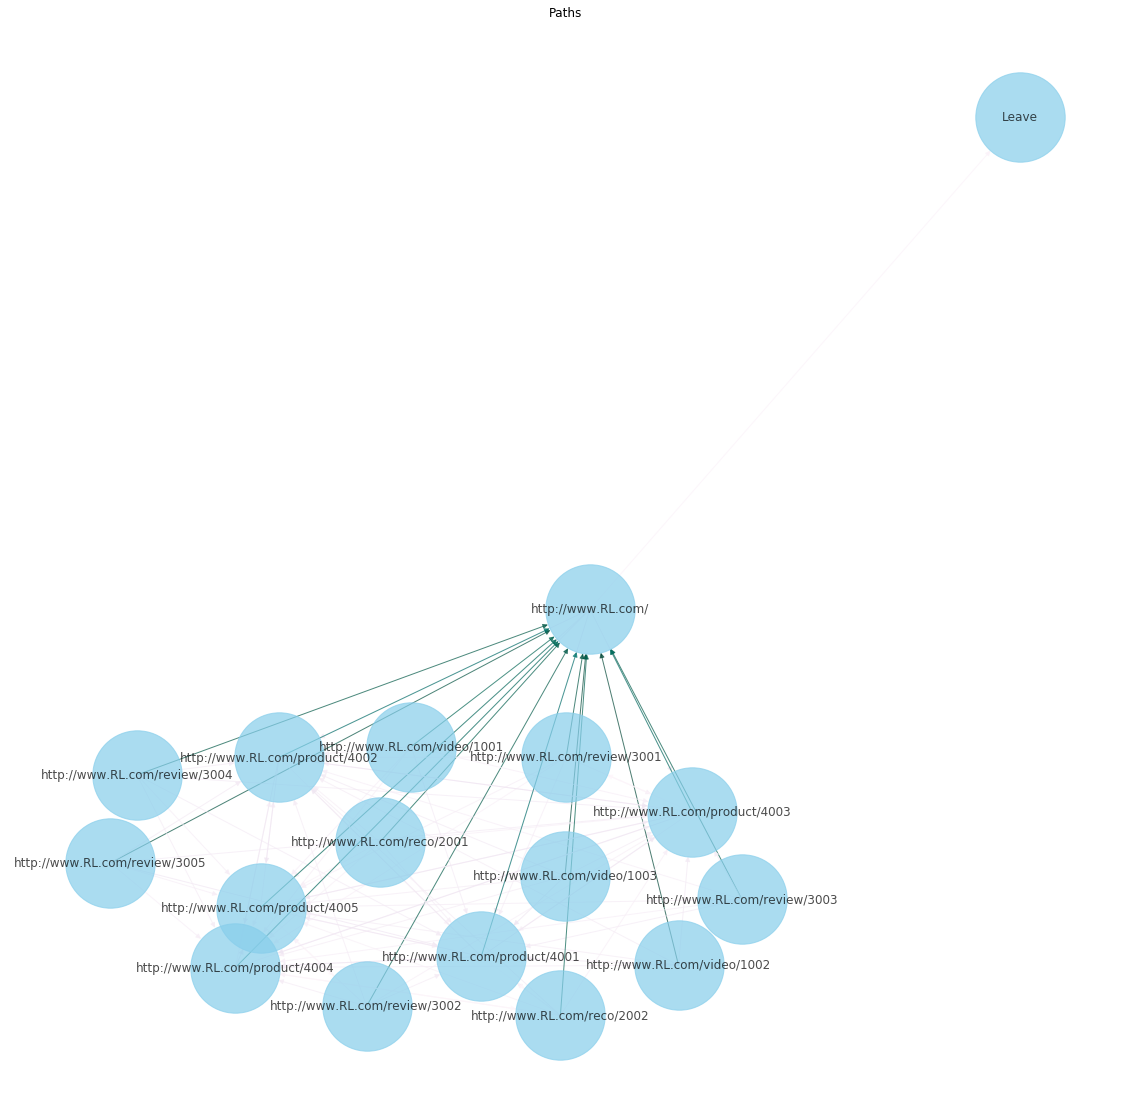

In [1395]:
# Graph
G = nx.from_pandas_edgelist(paths_subset, 'url', 'next_url', ['probability'], create_using=nx.DiGraph())

edges,weights = zip(*nx.get_edge_attributes(G,'probability').items())

plt.subplots(figsize = (20, 20))

edge_clr = plt.cm.PuBuGn

plt.title('Paths')
nx.draw_spring(G, node_color = 'skyblue', node_size = 8000, edge_color = weights, with_labels= True, alpha=0.7,
              edge_cmap = edge_clr, edge_vmin = min(weights), edge_vmax=max(weights))

## Path Buyers

We see no different path for buyers, with the most common next click being the homepage at about 35% probability, all other links having probability of 6-7%.

In [1396]:
# Identify all IDs for purchases of products 1-5
purchasers = clickstream_data[(clickstream_data['is_purchased'] == 1)]['IP_address'].unique()

# Create copy of dataset to work with
path_buyers = clickstream_data[['timestamp', 'IP_address','url', 'IP_click_count']].copy()
path_buyers = path_buyers[path_buyers['IP_address'].isin(purchasers)]
path_buyers['next_url'] = path_buyers['url'].shift(-1)

# Correct final click for the IP by setting it to "Leave"
path_buyers['next_url'] = np.where(path_buyers['IP_click_count'] >= path_buyers['IP_click_count'].shift(-1), 'Leave', path_buyers['next_url'] )

path_buyers = path_buyers.groupby(['url', 'next_url'])['IP_click_count'].agg([('click_count', 'count')])
path_buyers['probability'] = path_buyers / path_buyers.groupby(level=0).sum()
path_buyers.reset_index(inplace=True)

path_buyers_subset = path_buyers.sort_values('probability', ascending = False).groupby('url').head(7)

In [1398]:
path_buyers_subset[path_buyers_subset['url'].str.contains('review') ].sort_values(['url','probability'], ascending = False).head(20)

,url,next_url,click_count,probability
205,http://www.RL.com/review/3005,http://www.RL.com/,3610,0.359454
206,http://www.RL.com/review/3005,http://www.RL.com/product/4001,703,0.069999
207,http://www.RL.com/review/3005,http://www.RL.com/product/4002,619,0.061635
208,http://www.RL.com/review/3005,http://www.RL.com/product/4003,617,0.061436
209,http://www.RL.com/review/3005,http://www.RL.com/product/4004,563,0.056059
217,http://www.RL.com/review/3005,http://www.RL.com/review/3005,547,0.054466
210,http://www.RL.com/review/3005,http://www.RL.com/product/4005,542,0.053968
188,http://www.RL.com/review/3004,http://www.RL.com/,3486,0.352656
191,http://www.RL.com/review/3004,http://www.RL.com/product/4003,612,0.061912
190,http://www.RL.com/review/3004,http://www.RL.com/product/4002,602,0.060900


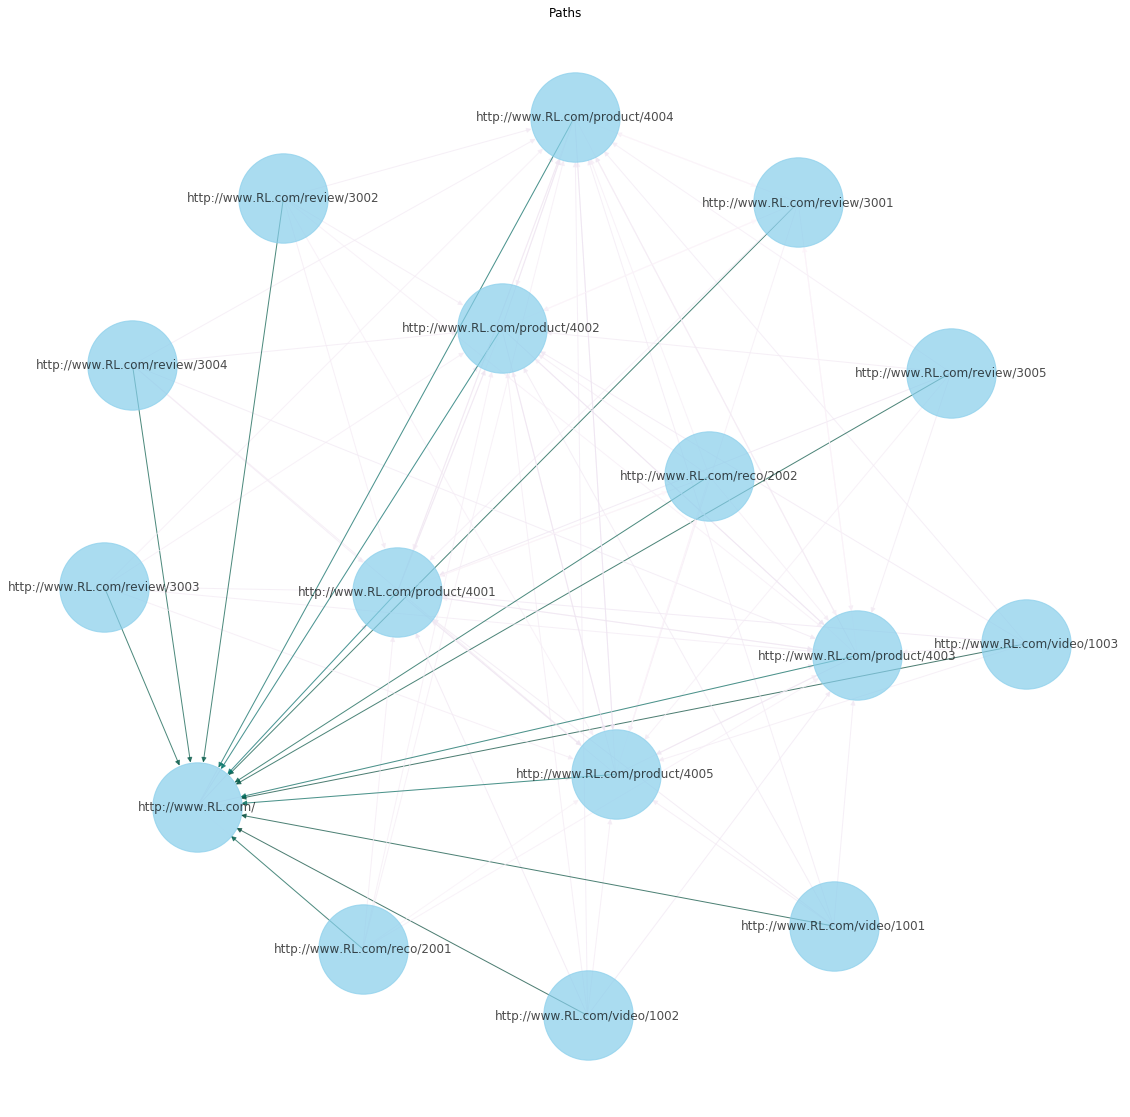

In [1399]:
# Graph
G = nx.from_pandas_edgelist(path_buyers_subset, 'url', 'next_url', ['probability'], create_using=nx.DiGraph())

edges,weights = zip(*nx.get_edge_attributes(G,'probability').items())

plt.subplots(figsize = (20, 20))

edge_clr = plt.cm.PuBuGn

plt.title('Paths')
nx.draw_spring(G, node_color = 'skyblue', node_size = 8000, edge_color = weights, with_labels= True, alpha=0.7,
              edge_cmap = edge_clr, edge_vmin = min(weights), edge_vmax=max(weights))

## Path Non-Buyers

Similarly, for non-buyers, we see the same pattern, with the most likely next click being the homepage. What is different here is that the 2nd most probable click is to leave with about 2% margin from the 3rd most popular click.

In [1400]:
# Create copy of dataset to work with
path_non_buyers = clickstream_data[['timestamp', 'IP_address','url', 'IP_click_count']].copy()
path_non_buyers = path_non_buyers[~path_non_buyers['IP_address'].isin(purchasers)]
path_non_buyers['next_url'] = path_non_buyers['url'].shift(-1)

# Correct final click for the IP by setting it to "Leave"
path_non_buyers['next_url'] = np.where(path_non_buyers['IP_click_count'] >= path_non_buyers['IP_click_count'].shift(-1), 'Leave', path_non_buyers['next_url'] )

path_non_buyers = path_non_buyers.groupby(['url', 'next_url'])['IP_click_count'].agg([('click_count', 'count')])
path_non_buyers['probability'] = path_non_buyers / path_non_buyers.groupby(level=0).sum()
path_non_buyers.reset_index(inplace=True)

path_non_buyers_subset = path_non_buyers.sort_values('probability', ascending = False).groupby('url').head(7)

In [1401]:
path_non_buyers_subset[path_non_buyers_subset['url'].str.contains('review') ].sort_values(['url','probability'], ascending = False).head(20)

,url,next_url,click_count,probability
205,http://www.RL.com/review/3005,http://www.RL.com/,1300,0.361211
204,http://www.RL.com/review/3005,Leave,296,0.082245
206,http://www.RL.com/review/3005,http://www.RL.com/product/4001,198,0.055015
217,http://www.RL.com/review/3005,http://www.RL.com/review/3005,195,0.054182
207,http://www.RL.com/review/3005,http://www.RL.com/product/4002,189,0.052515
208,http://www.RL.com/review/3005,http://www.RL.com/product/4003,172,0.047791
210,http://www.RL.com/review/3005,http://www.RL.com/product/4005,153,0.042512
188,http://www.RL.com/review/3004,http://www.RL.com/,1243,0.346626
187,http://www.RL.com/review/3004,Leave,237,0.066090
199,http://www.RL.com/review/3004,http://www.RL.com/review/3004,199,0.055494


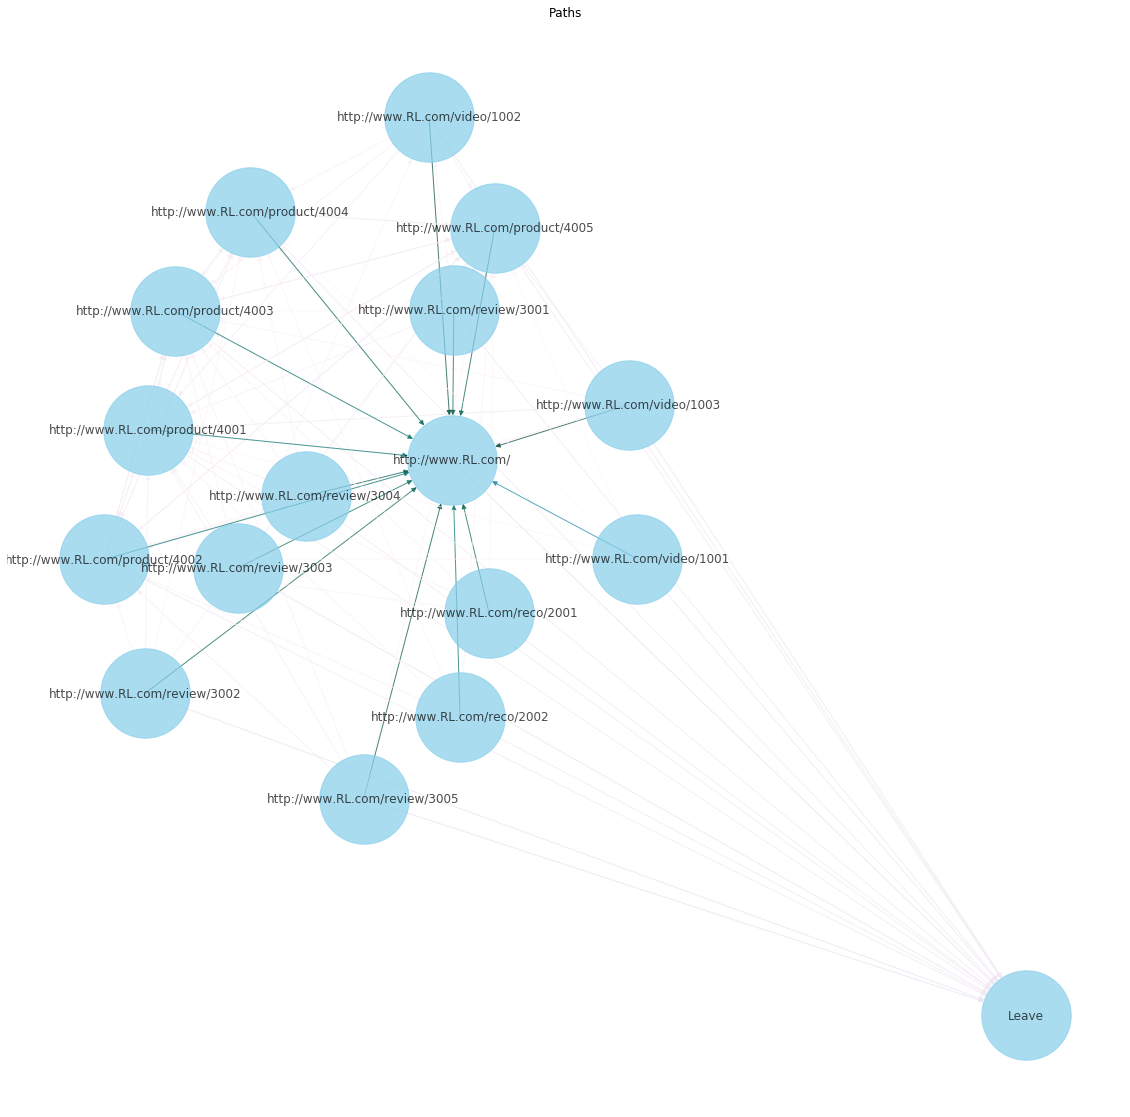

In [1402]:
# Graph
G = nx.from_pandas_edgelist(path_non_buyers_subset, 'url', 'next_url', ['probability'], create_using=nx.DiGraph())

edges,weights = zip(*nx.get_edge_attributes(G,'probability').items())

plt.subplots(figsize = (20, 20))

edge_clr = plt.cm.PuBuGn

plt.title('Paths')
nx.draw_spring(G, node_color = 'skyblue', node_size = 8000, edge_color = weights, with_labels= True, alpha=0.7,
              edge_cmap = edge_clr, edge_vmin = min(weights), edge_vmax=max(weights))

## Path Males

In [1407]:
# Identify all IDs for purchases of products 1-5
males = clickstream_data[clickstream_data['GENDER_CD'] == 'M']['IP_address'].unique()

# Create copy of dataset to work with
path_male = clickstream_data[['timestamp', 'IP_address','url', 'IP_click_count']].copy()
path_male = path_male[path_male['IP_address'].isin(males)]
path_male['next_url'] = path_male['url'].shift(-1)

# Correct final click for the IP by setting it to "Leave"
path_male['next_url'] = np.where(path_male['IP_click_count'] >= path_male['IP_click_count'].shift(-1),
                                 'Leave', 
                                 path_male['next_url'] )

path_male = path_male.groupby(['url', 'next_url'])['IP_click_count'].agg([('click_count', 'count')])
path_male['probability'] = path_male / path_male.groupby(level=0).sum()
path_male.reset_index(inplace=True)

path_male_subset = path_male.sort_values('probability', ascending = False).groupby('url').head(7)

In [1409]:
path_male_subset[path_male_subset['url'].str.contains('review') ].sort_values(['url','probability'], ascending = False).head(20)

,url,next_url,click_count,probability
205,http://www.RL.com/review/3005,http://www.RL.com/,1602,0.364422
206,http://www.RL.com/review/3005,http://www.RL.com/product/4001,286,0.065059
207,http://www.RL.com/review/3005,http://www.RL.com/product/4002,265,0.060282
208,http://www.RL.com/review/3005,http://www.RL.com/product/4003,263,0.059827
217,http://www.RL.com/review/3005,http://www.RL.com/review/3005,251,0.057097
210,http://www.RL.com/review/3005,http://www.RL.com/product/4005,216,0.049136
209,http://www.RL.com/review/3005,http://www.RL.com/product/4004,216,0.049136
188,http://www.RL.com/review/3004,http://www.RL.com/,1560,0.355515
190,http://www.RL.com/review/3004,http://www.RL.com/product/4002,263,0.059936
191,http://www.RL.com/review/3004,http://www.RL.com/product/4003,263,0.059936


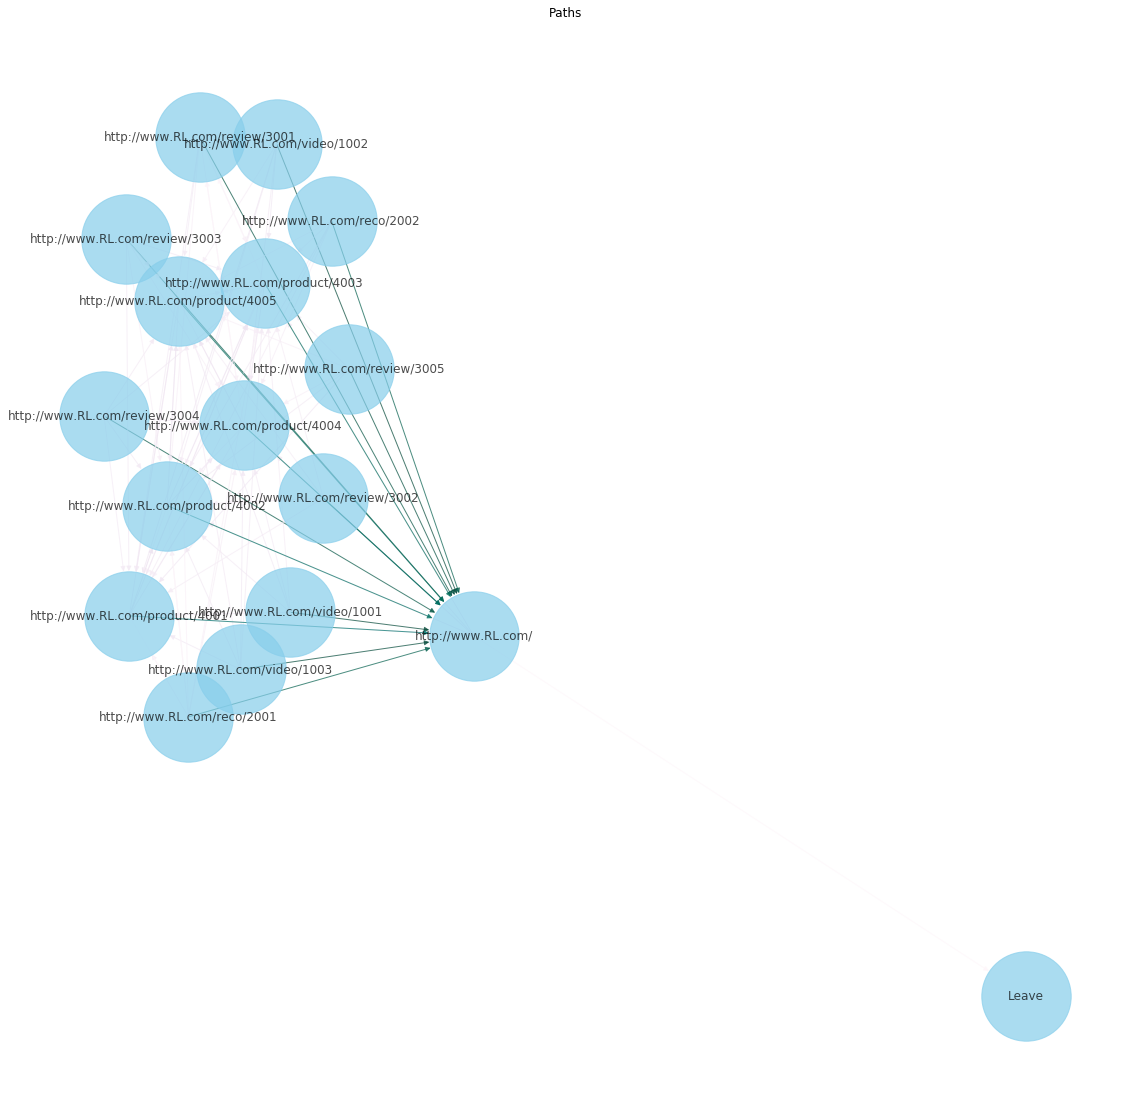

In [1410]:
# Graph
G = nx.from_pandas_edgelist(path_male_subset, 'url', 'next_url', ['probability'], create_using=nx.DiGraph())

edges,weights = zip(*nx.get_edge_attributes(G,'probability').items())

plt.subplots(figsize = (20, 20))

edge_clr = plt.cm.PuBuGn

plt.title('Paths')
nx.draw_spring(G, node_color = 'skyblue', node_size = 8000, edge_color = weights, with_labels= True, alpha=0.7,
              edge_cmap = edge_clr, edge_vmin = min(weights), edge_vmax=max(weights))

## Path Females

In [1411]:
# Create copy of dataset to work with
path_female = clickstream_data[['timestamp', 'IP_address','url', 'IP_click_count']].copy()
path_female = path_female[ ~ path_female['IP_address'].isin(males)]
path_female['next_url'] = path_female['url'].shift(-1)

# Correct final click for the IP by setting it to "Leave"
path_female['next_url'] = np.where(path_female['IP_click_count'] >= path_female['IP_click_count'].shift(-1),
                                 'Leave', 
                                 path_female['next_url'] )

path_female = path_female.groupby(['url', 'next_url'])['IP_click_count'].agg([('click_count', 'count')])
path_female['probability'] = path_female / path_female.groupby(level=0).sum()
path_female.reset_index(inplace=True)

path_female_subset = path_female.sort_values('probability', ascending = False).groupby('url').head(7)

In [1412]:
path_female_subset[path_female_subset['url'].str.contains('review') ].sort_values(['url','probability'], ascending = False).head(20)

,url,next_url,click_count,probability
205,http://www.RL.com/review/3005,http://www.RL.com/,3308,0.357776
206,http://www.RL.com/review/3005,http://www.RL.com/product/4001,615,0.066515
207,http://www.RL.com/review/3005,http://www.RL.com/product/4002,543,0.058728
208,http://www.RL.com/review/3005,http://www.RL.com/product/4003,526,0.056889
217,http://www.RL.com/review/3005,http://www.RL.com/review/3005,491,0.053104
209,http://www.RL.com/review/3005,http://www.RL.com/product/4004,489,0.052888
210,http://www.RL.com/review/3005,http://www.RL.com/product/4005,479,0.051806
188,http://www.RL.com/review/3004,http://www.RL.com/,3169,0.348894
189,http://www.RL.com/review/3004,http://www.RL.com/product/4001,531,0.058461
191,http://www.RL.com/review/3004,http://www.RL.com/product/4003,522,0.057470


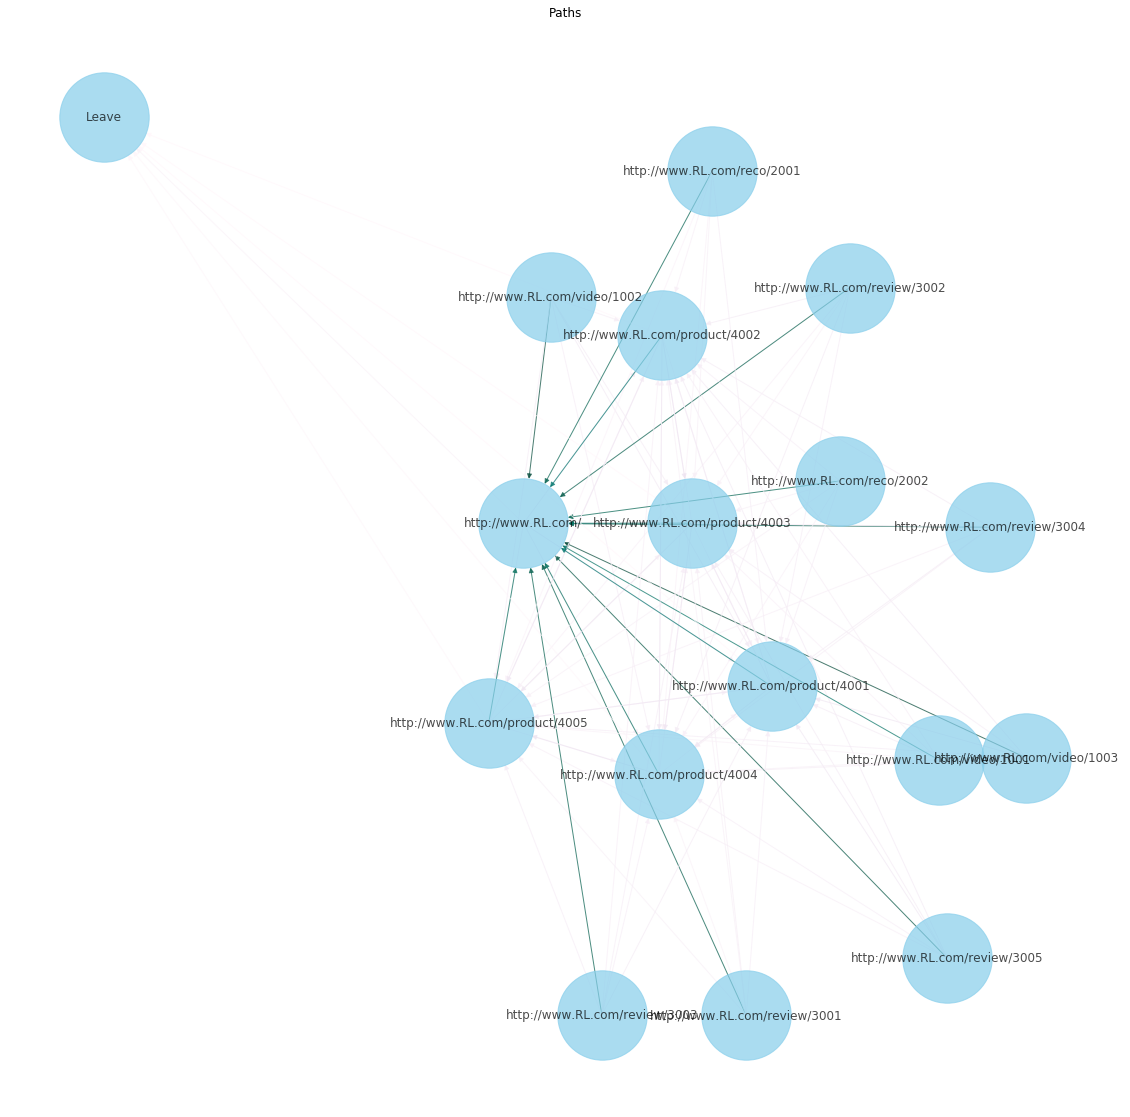

In [1413]:
# Graph
G = nx.from_pandas_edgelist(path_female_subset, 'url', 'next_url', ['probability'], create_using=nx.DiGraph())

edges,weights = zip(*nx.get_edge_attributes(G,'probability').items())

plt.subplots(figsize = (20, 20))

edge_clr = plt.cm.PuBuGn

plt.title('Paths')
nx.draw_spring(G, node_color = 'skyblue', node_size = 8000, edge_color = weights, with_labels= True, alpha=0.7,
              edge_cmap = edge_clr, edge_vmin = min(weights), edge_vmax=max(weights))

# Preliminary Analysis

In [162]:
clickstream_data.dtypes

clickstream_id       int64
timestamp           object
IP_address          object
url                 object
is_purchased         int64
is_page_errored    float64
user_session_id     object
city                object
state               object
country             object
product             object
dtype: object

In [484]:
t1 = pd.DataFrame({'IP':[1,1,1,1,2], 'Date':[1,1,1,2,1], 'Time':[11,11,12,13,11], 'Count':[0,1,0,0,0],'URL':['a','b','c','d','e']})
t1_c= pd.DataFrame({'IP':[1,1,1,1,2], 'Date':[1,1,1,2,1], 'Time':[11,11,12,13,11],'URL':['a','b','c','d','e']})
t1_c

,IP,Date,Time,URL
0,1,1,11,a
1,1,1,11,b
2,1,1,12,c
3,1,2,13,d
4,2,1,11,e


In [485]:
t1_c['ID1'] = range(1, len(t1_c.index)+1)
t1_c

,IP,Date,Time,URL,ID1
0,1,1,11,a,1
1,1,1,11,b,2
2,1,1,12,c,3
3,1,2,13,d,4
4,2,1,11,e,5


In [495]:
t2 = t1_c.set_index(['ID1','Time','Date','IP'], append=False)
t2 = t2.unstack().unstack()
t2

URL               
IP          1         2     
Date        1    2    1    2
ID1 Time                    
1   11      a  NaN  NaN  NaN
2   11      b  NaN  NaN  NaN
3   12      c  NaN  NaN  NaN
4   13    NaN    d  NaN  NaN
5   11    NaN  NaN    e  NaN

In [494]:
t3=t2.stack(dropna = False)
t3

URL     
IP               1    2
ID1 Time Date          
1   11   1     NaN  NaN
         2     NaN  NaN
2   11   1       a  NaN
         2     NaN  NaN
3   12   1       b  NaN
         2     NaN  NaN
4   13   1       c  NaN
         2     NaN  NaN
5   11   1     NaN  NaN
         2       d  NaN

In [478]:
t4 = t3.reset_index().sort_values('IP')
t4 = t4[['IP','Date','Time','Count', 'URL']]

In [479]:
t4

,IP,Date,Time,Count,URL
0,1,1,11,0,NaN
2,1,2,11,0,NaN
4,1,1,11,1,a
6,1,2,11,1,NaN
8,1,1,12,0,b
10,1,2,12,0,NaN
12,1,1,13,0,c
14,1,2,13,0,NaN
1,2,1,11,0,NaN
3,2,2,11,0,NaN
